##**Regressão Linear Multipla**

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()  # Isso abrirá uma janela para fazer upload do arquivo
df = pd.read_excel("Dados regressão linear multipla.xlsx")  # Após o upload, o arquivo estará acessível
df.head()

Saving Dados regressão linear multipla.xlsx to Dados regressão linear multipla (4).xlsx


,youtube,facebook,jornal,vendas
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Criando um DataFrame corretamente
df = df.rename(columns={'youtube': 'x1', 'facebook': 'x2', 'jornal': 'x3', 'vendas': 'y'})

# Definindo as variáveis independentes e dependentes
X = df[['x1', 'x2', 'x3']]  # Variáveis independentes
y = df['y']  # Variável dependente

# Adicionando uma constante (intercepto) ao modelo
X = sm.add_constant(X)

# Ajustando o modelo de regressão linear múltipla
model = sm.OLS(y, X).fit()

# Visualizando o resumo completo dos resultados
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           1.58e-96
Time:                        18:35:48   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267      0.374      9.422      0.0

Conseguimos analizar que vale a pena investir em propagandas no facebook e não investir nada no jornal pois não é relevanmte

In [ ]:
# Separando os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionando uma constante (intercepto) ao modelo
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Ajustando o modelo de regressão linear múltipla
model2 = sm.OLS(y_train, X_train).fit()

# Visualizando o resumo completo dos resultados
print(model2.summary())

# Realizando previsões com o conjunto de teste
y_pred = model2.predict(X_test)

# Calculando o Erro Quadrático Médio (MSE) e o R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo as métricas
print(f'\n')
print(f'Métricas da modelagem:')
print(f'MSE (Erro Quadrático Médio): {mse}')
print(f'R² (Coeficiente de Determinação): {r2}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           2.53e-76
Time:                        18:47:39   Log-Likelihood:                -335.81
No. Observations:                 160   AIC:                             679.6
Df Residuals:                     156   BIC:                             691.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5749      0.424      8.427      0.0

Visualizando gráficamente (várivel dependente)

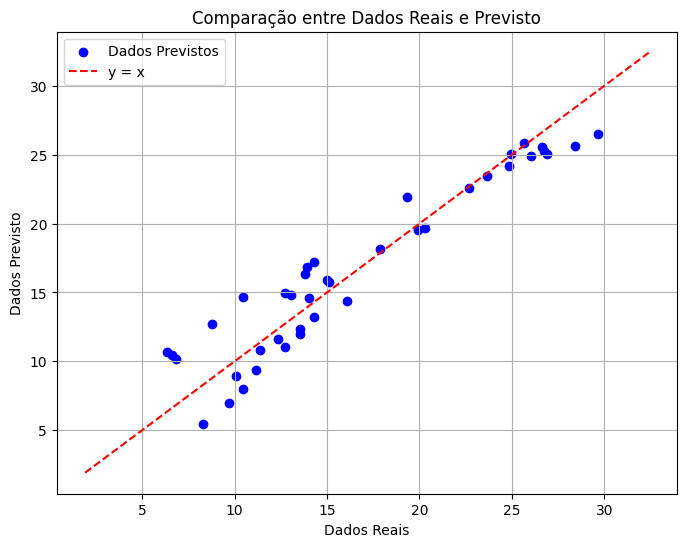

In [ ]:
# Visualizando a diferença entre dados reais e previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Dados Previstos')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='y = x')
plt.title('Comparação entre Dados Reais e Previsto')
plt.xlabel('Dados Reais')
plt.ylabel('Dados Previsto')
plt.legend()
plt.grid()
plt.show()